In [190]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt

In [191]:
data1=load_boston()
data=pd.DataFrame(data1["data"],columns=data1["feature_names"])
data["Traget"]=pd.Series(data1["target"])
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Traget
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [192]:
x=data.iloc[:,:-1]

In [193]:
y=data.iloc[:,-1:]

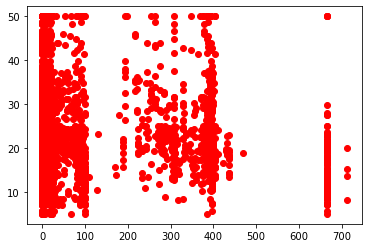

In [194]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
plt.plot(xtrain,ytrain,"ro");

0.708940229417711

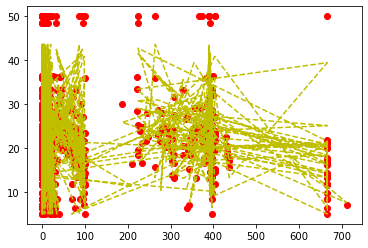

In [195]:
rd=Ridge()
rd.fit(xtrain,ytrain)
pred=rd.predict(xtest)
plt.plot(xtest,ytest,"ro",xtest,pred,"--y")
r2_score(ytest,pred)

0.7097031718453353

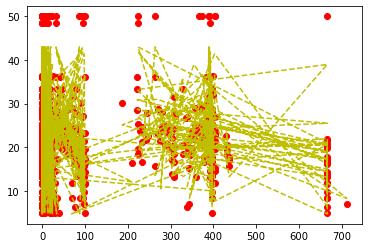

In [196]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
predlr=lr.predict(xtest)
plt.plot(xtest,ytest,"ro",xtest,predlr,"--y")
r2_score(ytest,predlr)

0.6702629521137022

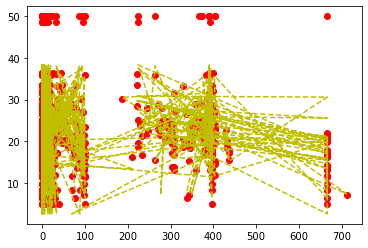

In [197]:
ls=Lasso()
ls.fit(xtrain,ytrain)
predls=ls.predict(xtest)
plt.plot(xtest,ytest,"ro",xtest,predls,"--y")
r2_score(ytest,predls)

C:\Users\RAHEEM~1\AppData\Local\Temp/ipykernel_6332/118214357.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


0.8584365077952986

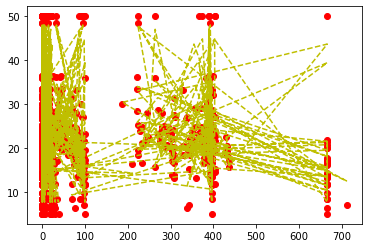

In [204]:

rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
predrf=rf.predict(xtest)
plt.plot(xtest,ytest,"ro",xtest,predrf,"--y")
r2_score(ytest,predrf)

In [205]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [206]:
loaded_model = pickle.load(open(filename, 'rb'))
pref=loaded_model.predict(xtest)
r2_score(ytest,pref)

0.8584365077952986